In [1]:
import sys
sys.path.append('..')
import ugent

In [2]:
from pyslise import SturmLiouville
from math import exp
import numpy as np

# https://doi.org/10.17512/jamcm.2016.2.14
alpha = 1/4
p = lambda x: (1+x)**2
q = lambda x: x**2 - 2
w = lambda x: exp(x)
a = 0
b = 1
N = 50

slp = SturmLiouville(p, q, w, a, b, tolerance=1e-15)
exact = np.array(list(zip(*slp.eigenvaluesByIndex(0, N, (0, 1), (0, 1))))[1])
exact

array([1.21092422e+01, 5.08654339e+01, 1.15473052e+02, 2.05925896e+02,
       3.22223026e+02, 4.64364201e+02, 6.32349337e+02, 8.26178398e+02,
       1.04585137e+03, 1.29136824e+03, 1.56272900e+03, 1.85993366e+03,
       2.18298221e+03, 2.53187464e+03, 2.90661096e+03, 3.30719117e+03,
       3.73361526e+03, 4.18588324e+03, 4.66399511e+03, 5.16795086e+03,
       5.69775050e+03, 6.25339403e+03, 6.83488143e+03, 7.44221273e+03,
       8.07538791e+03, 8.73440697e+03, 9.41926992e+03, 1.01299768e+04,
       1.08665275e+04, 1.16289221e+04, 1.24171606e+04, 1.32312429e+04,
       1.40711692e+04, 1.49369394e+04, 1.58285534e+04, 1.67460113e+04,
       1.76893131e+04, 1.86584588e+04, 1.96534484e+04, 2.06742818e+04,
       2.17209592e+04, 2.27934804e+04, 2.38918455e+04, 2.50160545e+04,
       2.61661074e+04, 2.73420041e+04, 2.85437448e+04, 2.97713293e+04,
       3.10247577e+04, 3.23040300e+04])

In [3]:
def solve(n):
    xs = np.linspace(a, b, n+1)
    ps = np.vectorize(p)(np.linspace(a, b, 2*n+1)[1::2])
    qs = np.vectorize(q)(xs[1:-1])
    ws = np.vectorize(w)(xs[1:-1])
    dx = 1/n

    # ps = np.array(range(0, n))

    D = np.zeros((n-1,n-1))
    np.fill_diagonal(D, -ps[1:] - ps[:-1])
    np.fill_diagonal(D[:-1,1:], ps[1:-1])
    np.fill_diagonal(D[1:,:-1], ps[1:-1])
    D /= dx*dx

    V = np.diag(ws**-1) @ (-D + np.diag(qs))
    found = np.array(sorted(np.linalg.eigvals(V))[:N])
    return found

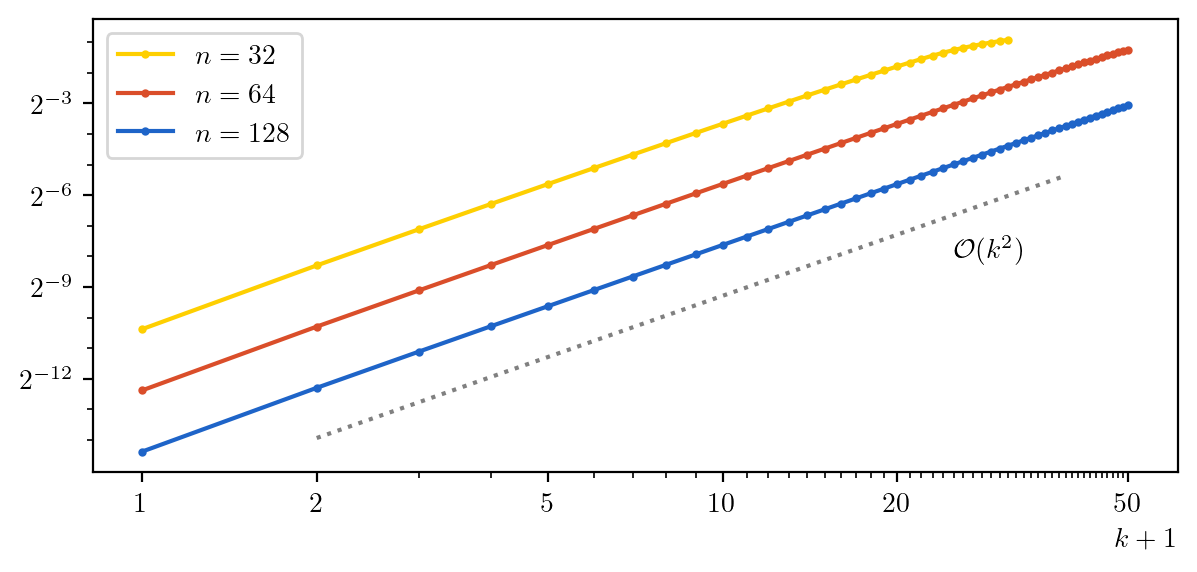

In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter

mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('font', family='serif', size=14, serif="Computer Modern Roman")

fig, ax = plt.subplots(figsize=(7, 3), dpi=200)

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=2)
ax.xaxis.set_major_locator(FixedLocator([1, 2, 5, 10, 20, 50]))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(FixedLocator(range(1, N)))
ax.xaxis.set_minor_formatter(FormatStrFormatter(""))

ax.yaxis.set_major_locator(FixedLocator([2**-i for i in range(3, 15, 3)]))
ax.yaxis.set_minor_locator(FixedLocator([2**-i for i in range(1, 15, 1)]))
ax.yaxis.set_minor_formatter(FormatStrFormatter(""))


xs = np.array(range(2, N-10))
ax.plot(xs, xs**2 * 1.6e-5, c="gray", ls=':')
ax.text(25, 3.8e-3, "$\\mathcal{O}(k^2)$")

for c, n in list(zip(ugent.palet, [32, 64, 128][::-1]))[::-1]:
    found = solve(n)
    ax.plot(range(1, 1+len(found)), np.abs(exact[:len(found)] - found)/exact[:len(found)],
            label=f"$n = {n}$", c=c, marker='.', ms=4)
ax.legend()
ax.set_xlabel('$k+1$', loc='right')

plt.savefig('finite_difference_k_error.pdf', bbox_inches="tight")

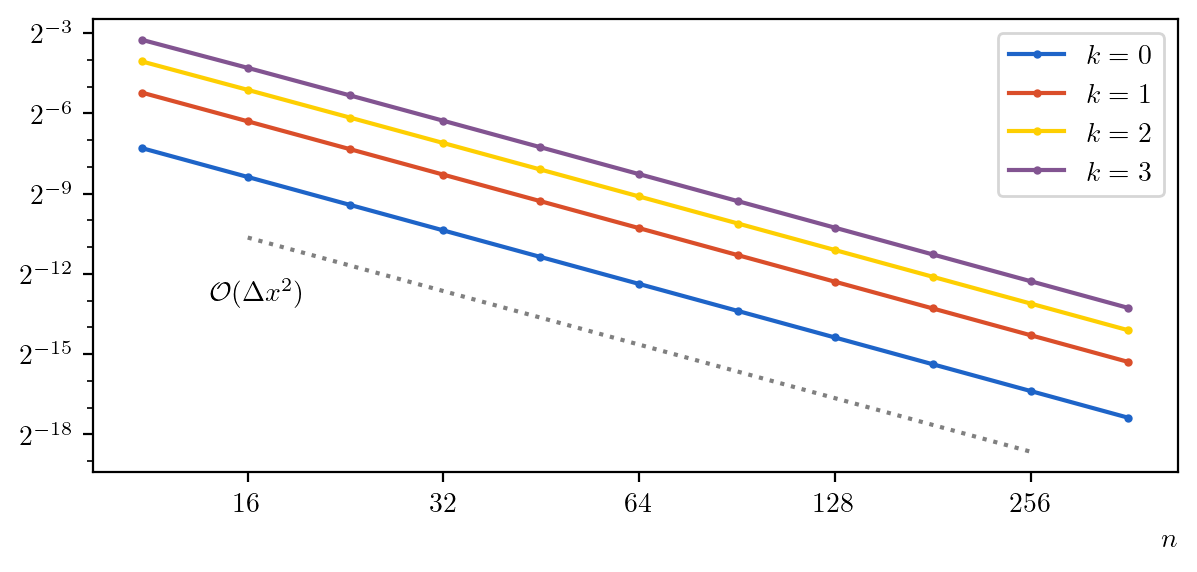

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter

fig, ax = plt.subplots(figsize=(7, 3), dpi=200)

ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(FormatStrFormatter(""))

ax.yaxis.set_major_locator(FixedLocator([2**-i for i in range(3, 30, 3)]))
ax.yaxis.set_minor_locator(FixedLocator([2**-i for i in range(1, 30, 1)]))
ax.yaxis.set_minor_formatter(FormatStrFormatter(""))


ns = np.round(2**np.linspace(3.5, 8.5, 11))
ax.plot(ns[1:-1], 1/ns[1:-1]**2 * 1.6e-1, c="gray", ls=':')
ax.text(14, 2**-13, "$\\mathcal{O}(\Delta x^2)$")

data = [[] for _ in range(4)]
for n in ns:
    found = solve(int(n))
    
    errors = np.abs(exact[:len(found)] - found)/exact[:len(found)]
    
    for c, f in zip(data, errors):
        c.append(f)

for k, (c, d) in enumerate(zip(ugent.palet, data)):
    ax.plot(ns, d,
            label=f"$k = {k}$", c=c, marker='.', ms=4)
ax.legend(loc='upper right')
ax.set_xlabel('$n$', loc='right')

plt.savefig('finite_difference_h_error.pdf', bbox_inches="tight")